In [2]:
%env HTTP_PROXY=http://127.0.0.1:10809
%env HTTPS_PROXY=http://127.0.0.1:10809

env: HTTP_PROXY=http://127.0.0.1:10809
env: HTTPS_PROXY=http://127.0.0.1:10809


In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

d:\Anaconda\envs\wz_py_3_8\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
sequence = "In a hole in the ground there lived a hobbit."
print(tokenizer(sequence))

{'input_ids': [101, 1999, 1037, 4920, 1999, 1996, 2598, 2045, 2973, 1037, 7570, 10322, 4183, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [6]:
import cv2 as cv
img = cv.imread("C:\\Users\\18801\Desktop\\pipeline-cat-chonk.jpeg")
img_tensor = image_processor(img)
print(type(img_tensor))
# cv.imshow(img)

<class 'transformers.image_processing_base.BatchFeature'>


In [7]:
print(image_processor)

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [8]:
print(dir(img_tensor))

['_MutableMapping__marker', '__abstractmethods__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_is_as_tensor_fns', 'clear', 'convert_to_tensors', 'copy', 'data', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'to', 'update', 'values']


In [9]:
print(type(img_tensor.data['pixel_values'][0]))
print(img_tensor.data['pixel_values'][0].shape)
img = img_tensor.data['pixel_values'][0]

<class 'numpy.ndarray'>
(3, 224, 224)


In [10]:
import numpy

img = img.transpose(1, 2, 0)
img = (img * 255).astype(numpy.uint8)
print(img.shape)

(224, 224, 3)


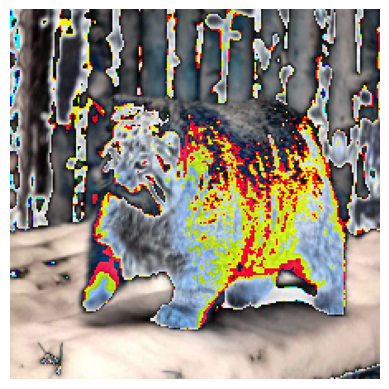

In [11]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')  # 关闭坐标轴显示
plt.show()

In [12]:
from transformers import AutoImageProcessor, AutoBackbone
import torch
from PIL import Image
import requests

In [13]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
img = Image.open(requests.get(url, stream=True).raw)
processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

d:\Anaconda\envs\wz_py_3_8\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\18801\.cache\huggingface\hub\models--microsoft--swin-tiny-patch4-window7-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [14]:
model = AutoBackbone.from_pretrained("microsoft/swin-tiny-patch4-window7-224", out_indices=(1, ))
inputs = processor(img, return_tensors="pt")

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of SwinBackbone were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized: ['swin.hidden_states_norms.stage1.bias', 'swin.hidden_states_norms.stage1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
outputs = model(**inputs)
feature_maps = outputs.feature_maps
list(feature_maps[0].shape)

[1, 96, 56, 56]

In [16]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(
    "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
)

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

d:\Anaconda\envs\wz_py_3_8\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\18801\.cache\huggingface\hub\models--ehcalabres--wav2vec2-lg-xlsr-en-speech-emotion-recognition. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
print(feature_extractor)

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": true,
  "sampling_rate": 16000
}



In [18]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("distilbert/distilbert-base-uncased")

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
